<a href="https://colab.research.google.com/github/lisawermers/MAT421/blob/main/MAT421ModuleGPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21.4, 21.5

**21.4: Simpson's Rule**

Given two consecutive subintervals $[x_{i-1},x_i]$ and $[x_i,x_{i+1}]$, Simpson's Rule approximates the area over them by fitting a quadratic polynomial through the points $(x_{i-1},f(x_{i-1}))$, $(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$ and then integrates the quadratic exactly. 

The Simpson's Rule approximation for the integral over this subinterval is represented by: 

$\frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))+O(h^5)$

Here's an example of Simpson's Rule being used to evaluate $\int_0^{\pi}sin(x)dx$ with 11 evenly spaced grid points over the whole interval. 

In [4]:
import numpy as np

a = 0 
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace( a, b, n)
f = np.sin(x)
I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


**21.5: Computing Integrals in Python**

The scipy.integrate package has a few different function for computing integrals of functions. The *trapz* function takes an array of function values f computed on a numerical grid x as its input arguments. 

Let's look at an example of it used to evaluate $\int_0^{\pi}sin(x)dx$ with 11 evenly spaced grid points over the whole interval. 

In [5]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


Sometimes we need to know the approximated cumulative integral in which case we will use the *cumtrapz* function which takes the same input arguments as trapz. 

Let's use it to approximate the cumulative integral of f(x) = sin(x) from 0 to $\pi$ with a discretization step of 0.01. 

<ipython-input-13-a77950cb8dd8>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


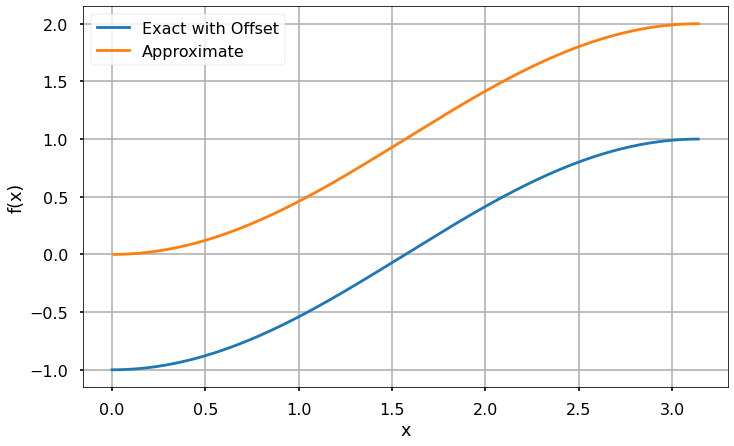

In [13]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn-poster")

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approximate'])
plt.show()

And finally, the *quad(f,a,b)* function uses a different numerical differentiation scheme to evaluate the integral of f from a to b. This gives the correct, exact answer.  

Let's use it to evaluate $\int_0^{\pi}sin(x)dx$ 

In [14]:
from scipy.integrate import quad
I_quad, est_err_quad = quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
